---
#### Understanding Data and its Structure

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io

file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER.mat"
data = scipy.io.loadmat(file_path, struct_as_record=False, squeeze_me=True)

print("Top-level keys in the dataset:")
print(data.keys())

dreamer_data = data["DREAMER"]
print("\nTop-level fields in DREAMER structure:")
print(dir(dreamer_data))

Top-level keys in the dataset:
dict_keys(['__header__', '__version__', '__globals__', 'DREAMER'])

Top-level fields in DREAMER structure:
['Acknowledgement', 'Data', 'Disclaimer', 'ECG_SamplingRate', 'EEG_Electrodes', 'EEG_SamplingRate', 'Provider', 'Version', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'noOfSubjects', 'noOfVideoSequences']


In [ ]:
print(f"Type of DREAMER.Data: {type(dreamer_data.Data)}")
print(f"Number of participants: {len(dreamer_data.Data)}")

participant_1 = dreamer_data.Data[0]

print("\nFields in first participant's data:")
print(dir(participant_1))

Type of DREAMER.Data: <class 'numpy.ndarray'>
Number of participants: 23

Fields in first participant's data:
['Age', 'ECG', 'EEG', 'Gender', 'ScoreArousal', 'ScoreDominance', 'ScoreValence', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames']


In [ ]:
participant_1 = dreamer_data.Data[0]

print(f"Age: {participant_1.Age}")
print(f"Gender: {participant_1.Gender}")

print(f"\nShape of ScoreValence: {participant_1.ScoreValence.shape}")
print(f"Shape of ScoreArousal: {participant_1.ScoreArousal.shape}")
print(f"Shape of ScoreDominance: {participant_1.ScoreDominance.shape}")

print("\nFields in EEG data:")
print(dir(participant_1.EEG))

print("\nFields in ECG data:")
print(dir(participant_1.ECG))

Age: 22
Gender: male

Shape of ScoreValence: (18,)
Shape of ScoreArousal: (18,)
Shape of ScoreDominance: (18,)

Fields in EEG data:
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'baseline', 'stimuli']

Fields in ECG data:
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'baseline', 'stimuli']


In [ ]:
print(f"Number of EEG baseline recordings: {len(participant_1.EEG.baseline)}")
print(f"Number of EEG stimuli recordings: {len(participant_1.EEG.stimuli)}")
print(f"Number of ECG baseline recordings: {len(participant_1.ECG.baseline)}")
print(f"Number of ECG stimuli recordings: {len(participant_1.ECG.stimuli)}")

eeg_baseline_sample = participant_1.EEG.baseline[0]
ecg_baseline_sample = participant_1.ECG.baseline[0]

print(f"\nShape of first EEG baseline recording: {eeg_baseline_sample.shape}")
print(f"Shape of first ECG baseline recording: {ecg_baseline_sample.shape}")

eeg_stimuli_sample = participant_1.EEG.stimuli[0]
ecg_stimuli_sample = participant_1.ECG.stimuli[0]

print(f"\nShape of first EEG stimuli recording: {eeg_stimuli_sample.shape}")
print(f"Shape of first ECG stimuli recording: {ecg_stimuli_sample.shape}")

Number of EEG baseline recordings: 18
Number of EEG stimuli recordings: 18
Number of ECG baseline recordings: 18
Number of ECG stimuli recordings: 18

Shape of first EEG baseline recording: (7808, 14)
Shape of first ECG baseline recording: (15616, 2)

Shape of first EEG stimuli recording: (25472, 14)
Shape of first ECG stimuli recording: (50944, 2)


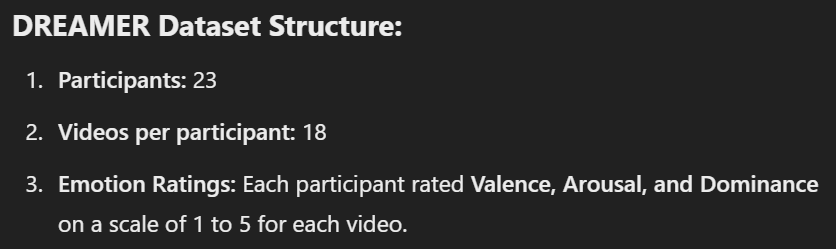

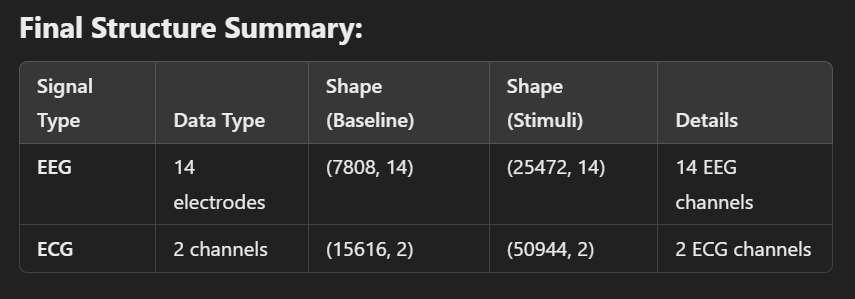

---
#### Visualize EEG/ECG Signals (Ploting raw waveforms)

---

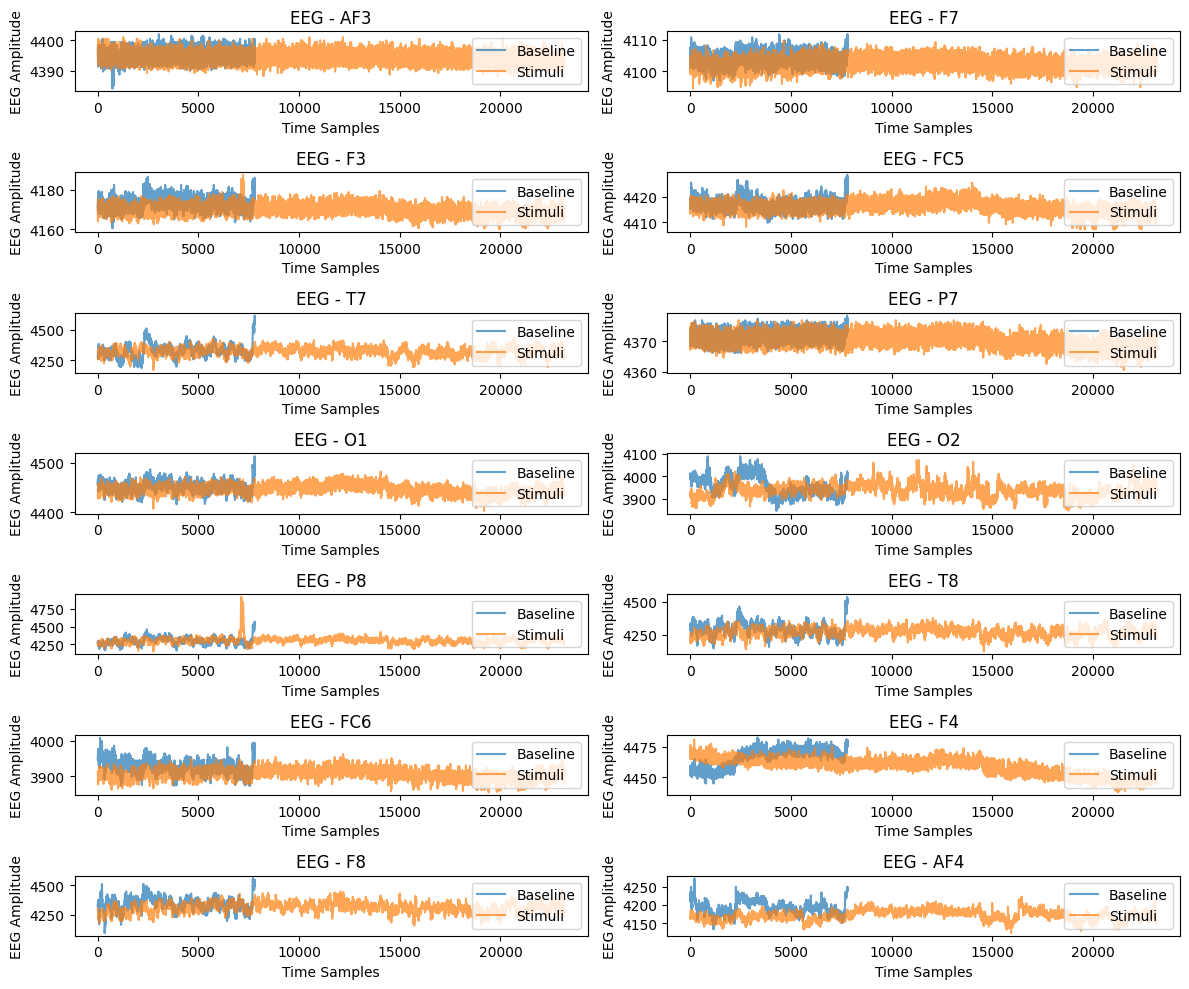

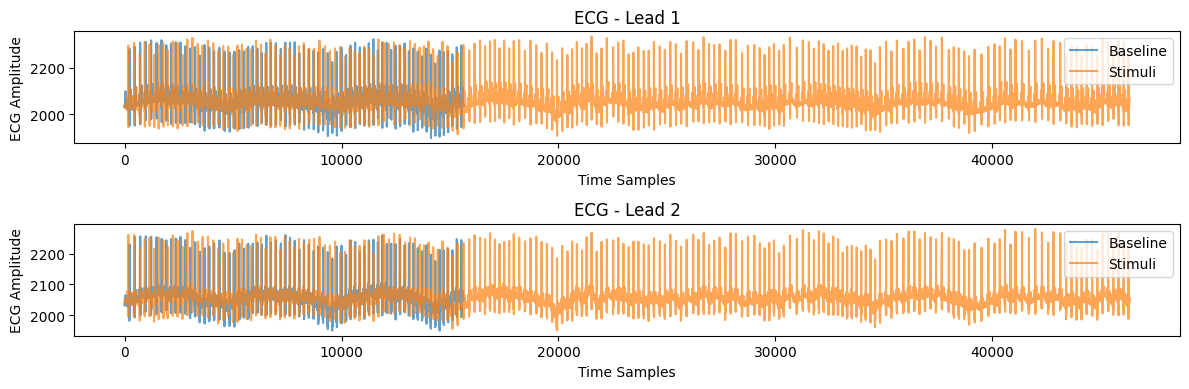

In [ ]:
# each subplot for 14 EEG channel
# 2 subplots for both ECG channel

import numpy as np
import matplotlib.pyplot as plt
import random

random_participant = random.randint(0, len(dreamer_data.Data) - 1)
random_video = random.randint(0, 17)

participant = dreamer_data.Data[random_participant]

eeg_baseline = participant.EEG.baseline[random_video]
eeg_stimuli = participant.EEG.stimuli[random_video]

ecg_baseline = participant.ECG.baseline[random_video]
ecg_stimuli = participant.ECG.stimuli[random_video]

eeg_channels = dreamer_data.EEG_Electrodes

plt.figure(figsize=(12, 10))
for i in range(14):
    plt.subplot(7, 2, i + 1)
    plt.plot(eeg_baseline[:, i], label="Baseline", alpha=0.7)
    plt.plot(eeg_stimuli[:, i], label="Stimuli", alpha=0.7)
    plt.title(f"EEG - {eeg_channels[i]}")
    plt.xlabel("Time Samples")
    plt.ylabel("EEG Amplitude")
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
for i in range(2):
    plt.subplot(2, 1, i + 1)
    plt.plot(ecg_baseline[:, i], label="Baseline", alpha=0.7)
    plt.plot(ecg_stimuli[:, i], label="Stimuli", alpha=0.7)
    plt.title(f"ECG - Lead {i+1}")
    plt.xlabel("Time Samples")
    plt.ylabel("ECG Amplitude")
    plt.legend()

plt.tight_layout()
plt.show()

Emotiv EPOC+ EEG Headset

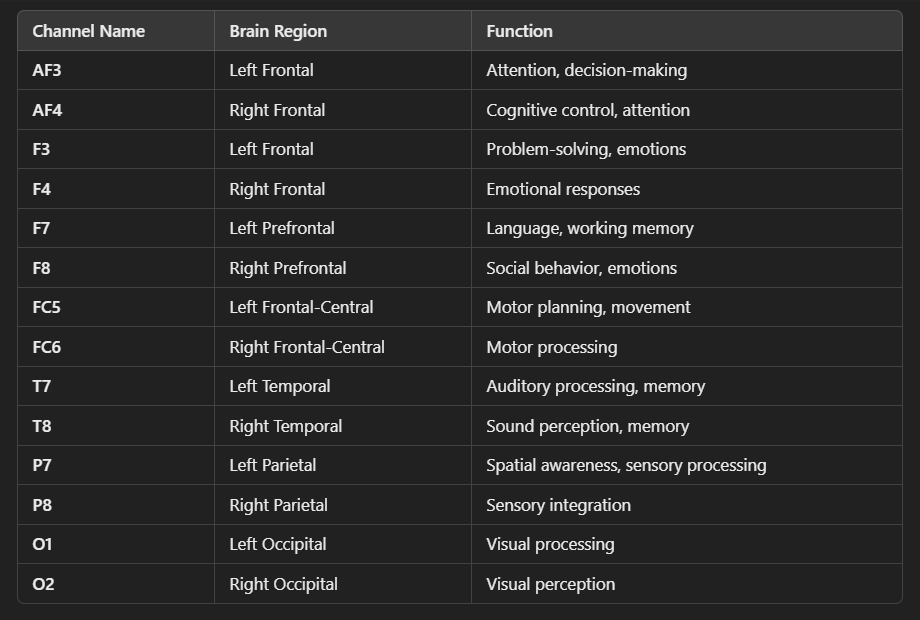

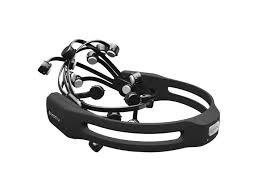



Shimmer ECG Sensor

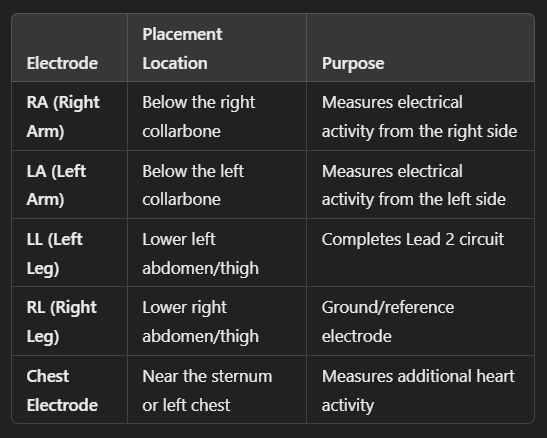

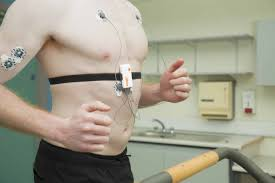

Lead 1=LA−RA

Lead 2=LL−RA

In [ ]:
# Check for missing values in EEG and ECG
missing_data = []
for participant in dreamer_data.Data:
    for i in range(18):  # Each participant has 18 videos
        if participant.EEG.stimuli[i] is None or participant.ECG.stimuli[i] is None:
            missing_data.append((participant.Age, i))

# Display missing records
print(f"Missing EEG/ECG recordings: {missing_data}")


Missing EEG/ECG recordings: []


---
### Bandpass Filtering
---

Remove Artifacts from data:muscle noise, eye blinks, etc

In [ ]:
from scipy.signal import butter, filtfilt

# Define bandpass filter function
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
# fs -> sampling rate

    nyquist = 0.5 * fs  # Nyquist frequency (fs/2)

    # Ensure cutoff frequencies are within the valid range
    if highcut >= nyquist:
        highcut = nyquist - 1  # Adjust highcut to avoid exceeding Nyquist limit
    if lowcut <= 0:
        lowcut = 0.1  # Avoid zero or negative cutoff frequency

    low = lowcut / nyquist
    high = highcut / nyquist

    b, a = butter(order, [low, high], btype="band")
    return filtfilt(b, a, signal, axis=0)

# Get sampling rates
fs_eeg = dreamer_data.EEG_SamplingRate  # 128 Hz
fs_ecg = dreamer_data.ECG_SamplingRate  # 256 Hz

# Apply bandpass filter with corrected frequency values
filtered_eeg = bandpass_filter(participant.EEG.stimuli[0], 0.5, 45, fs_eeg)
filtered_ecg = bandpass_filter(participant.ECG.stimuli[0], 0.05, 100, fs_ecg)  # Adjusted highcut to 100 Hz


Original EEG Signal (First 10 Samples):
[[4218.97435897 4085.12820513 4177.43589744 4431.28205128 4317.94871795
  4374.35897436 4455.38461538 3963.07692308 4298.46153846 4332.30769231
  3923.07692308 4524.1025641  4285.12820513 4169.23076923]
 [4229.23076923 4104.61538462 4182.05128205 4424.61538462 4337.43589744
  4381.53846154 4455.38461538 3968.20512821 4315.38461538 4345.12820513
  3933.33333333 4526.15384615 4297.43589744 4183.07692308]
 [4233.84615385 4101.53846154 4176.92307692 4417.94871795 4337.43589744
  4380.51282051 4448.20512821 3961.53846154 4306.66666667 4346.15384615
  3937.94871795 4525.12820513 4300.         4186.66666667]
 [4231.79487179 4098.97435897 4177.94871795 4423.58974359 4321.53846154
  4371.28205128 4441.53846154 3955.38461538 4294.35897436 4337.94871795
  3937.43589744 4529.23076923 4303.07692308 4184.61538462]
 [4229.74358974 4105.12820513 4181.02564103 4429.74358974 4323.07692308
  4366.66666667 4441.53846154 3949.23076923 4296.41025641 4335.8974359
  393

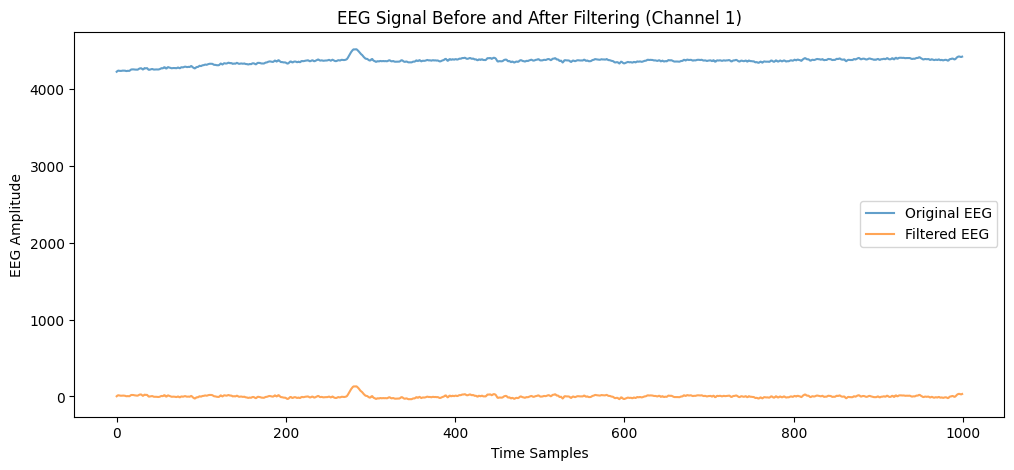

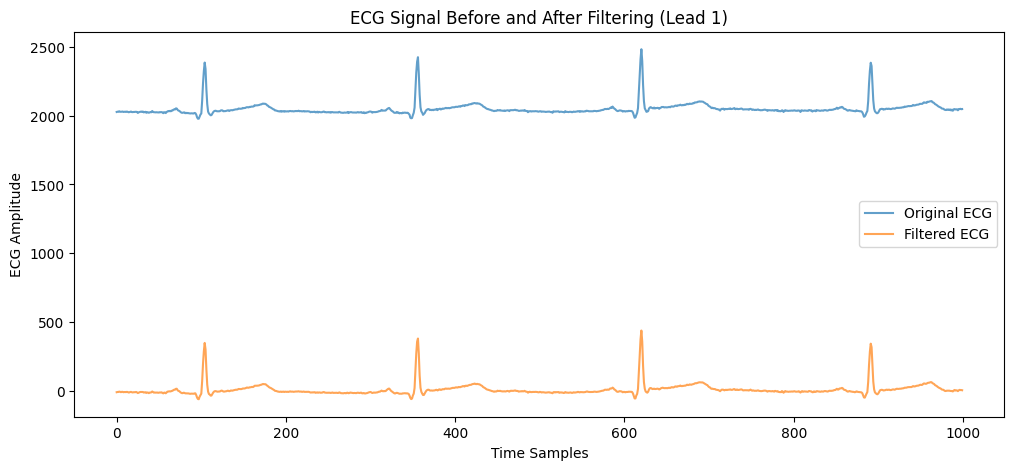

In [ ]:
import matplotlib.pyplot as plt

print("Original EEG Signal (First 10 Samples):")
print(participant.EEG.stimuli[0][:10])

print("\nFiltered EEG Signal (First 10 Samples):")
print(filtered_eeg[:10])

print("\nOriginal ECG Signal (First 10 Samples):")
print(participant.ECG.stimuli[0][:10])

print("\nFiltered ECG Signal (First 10 Samples):")
print(filtered_ecg[:10])

plt.figure(figsize=(12, 5))
plt.plot(participant.EEG.stimuli[0][:1000, 0], label="Original EEG", alpha=0.7)
plt.plot(filtered_eeg[:1000, 0], label="Filtered EEG", alpha=0.7)
plt.xlabel("Time Samples")
plt.ylabel("EEG Amplitude")
plt.title("EEG Signal Before and After Filtering (Channel 1)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(participant.ECG.stimuli[0][:1000, 0], label="Original ECG", alpha=0.7)
plt.plot(filtered_ecg[:1000, 0], label="Filtered ECG", alpha=0.7)
plt.xlabel("Time Samples")
plt.ylabel("ECG Amplitude")
plt.title("ECG Signal Before and After Filtering (Lead 1)")
plt.legend()
plt.show()

---
### Feature Extraction from EEG & ECG
---


In [ ]:
import numpy as np
import pandas as pd
from scipy.fftpack import fft
import os

# Function to extract statistical features (per channel)
def extract_statistical_features(signal):
    features = {}
    for i in range(signal.shape[1]):  # Loop through each channel
        features.update({
            f"Mean_Ch{i+1}": np.mean(signal[:, i]),
            f"Std_Ch{i+1}": np.std(signal[:, i]),
            f"Min_Ch{i+1}": np.min(signal[:, i]),
            f"Max_Ch{i+1}": np.max(signal[:, i]),
            f"Power_Ch{i+1}": np.sum(signal[:, i] ** 2) / len(signal[:, i])
        })
    return features

# Function to extract frequency domain features using FFT
def extract_fft_features(signal, sampling_rate):
    fft_features = {}
    for i in range(signal.shape[1]):  # Loop through each channel
        fft_values = np.abs(fft(signal[:, i]))
        power_spectrum = np.square(fft_values)
        freq_bins = np.fft.fftfreq(len(signal[:, i]), d=1/sampling_rate)

        fft_features.update({
            f"Delta_Power_Ch{i+1}": np.sum(power_spectrum[(freq_bins >= 0.5) & (freq_bins < 4)]),
            f"Theta_Power_Ch{i+1}": np.sum(power_spectrum[(freq_bins >= 4) & (freq_bins < 8)]),
            f"Alpha_Power_Ch{i+1}": np.sum(power_spectrum[(freq_bins >= 8) & (freq_bins < 12)]),
            f"Beta_Power_Ch{i+1}": np.sum(power_spectrum[(freq_bins >= 12) & (freq_bins < 30)]),
            f"Gamma_Power_Ch{i+1}": np.sum(power_spectrum[(freq_bins >= 30) & (freq_bins < 45)])
        })
    return fft_features

# Define file path (ensure overwrite)
save_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_features.csv"

# If file exists, remove it to prevent duplication
if os.path.exists(save_path):
    os.remove(save_path)

# Extract features for all EEG & ECG signals
all_features = []

for participant in dreamer_data.Data:
    for i in range(18):  # Each participant watches 18 videos
        eeg_signal = bandpass_filter(participant.EEG.stimuli[i], 0.5, 45, fs_eeg)  # Filter EEG
        ecg_signal = bandpass_filter(participant.ECG.stimuli[i], 0.05, 100, fs_ecg)  # Filter ECG

        # Extract features
        eeg_features = extract_statistical_features(eeg_signal)
        ecg_features = extract_statistical_features(ecg_signal)
        eeg_fft_features = extract_fft_features(eeg_signal, fs_eeg)
        ecg_fft_features = extract_fft_features(ecg_signal, fs_ecg)

        # Combine all features into a single dictionary
        feature_dict = {
            "Participant": participant.Age,
            "Video_ID": i,
            "Valence": participant.ScoreValence[i],
            "Arousal": participant.ScoreArousal[i],
            "Dominance": participant.ScoreDominance[i]
        }
        feature_dict.update(eeg_features)
        feature_dict.update(ecg_features)
        feature_dict.update(eeg_fft_features)
        feature_dict.update(ecg_fft_features)

        all_features.append(feature_dict)

# Convert to DataFrame and save (overwrite existing file)
features_df = pd.DataFrame(all_features)
features_df.to_csv(save_path, index=False)

print("Feature extraction complete. Features saved to 'DREAMER_features.csv'.")


Feature extraction complete. Features saved to 'DREAMER_features.csv'.


Statistical Features (Time-Domain Features)

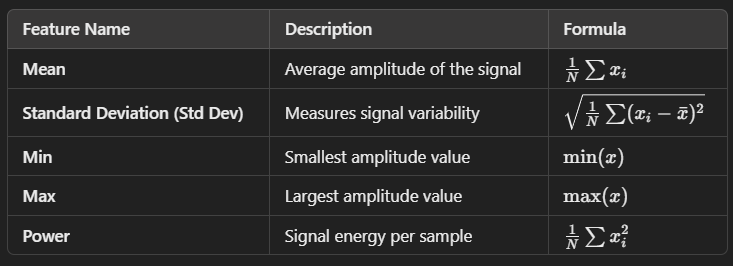

Frequency-Domain Features (FFT Power Spectral Analysis)

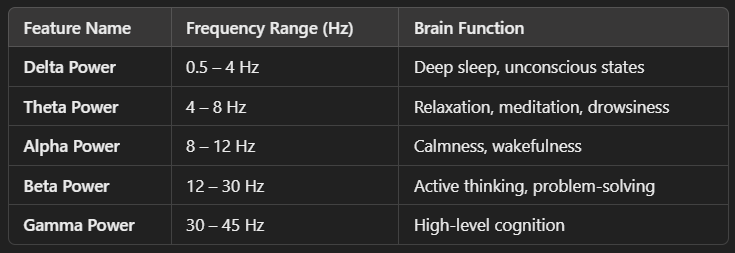

---
### Data Normalization
---


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_features.csv"
features_df = pd.read_csv(file_path)

X = features_df.drop(columns=["Participant", "Video_ID", "Valence", "Arousal", "Dominance"])
y_valence = features_df["Valence"]
y_arousal = features_df["Arousal"]
y_dominance = features_df["Dominance"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_valence, test_size=0.2, random_state=42)

processed_data = pd.DataFrame(X_scaled, columns=X.columns)
processed_data["Valence"] = y_valence
processed_data["Arousal"] = y_arousal
processed_data["Dominance"] = y_dominance

processed_data.to_csv("/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv", index=False)

print(" Data normalization complete. Saved as 'DREAMER_normalized.csv'.")

 Data normalization complete. Saved as 'DREAMER_normalized.csv'.


---
### Random Forest Regressor
---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load preprocessed data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# Extract features and labels
X = data.drop(columns=["Valence", "Arousal", "Dominance"])
y_valence = data["Valence"]
y_arousal = data["Arousal"]
y_dominance = data["Dominance"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_val, y_test_val = train_test_split(X, y_valence, test_size=0.2, random_state=42)
X_train, X_test, y_train_aro, y_test_aro = train_test_split(X, y_arousal, test_size=0.2, random_state=42)
X_train, X_test, y_train_dom, y_test_dom = train_test_split(X, y_dominance, test_size=0.2, random_state=42)

# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model on each target variable
model.fit(X_train, y_train_val)
y_pred_val = model.predict(X_test)

model.fit(X_train, y_train_aro)
y_pred_aro = model.predict(X_test)

model.fit(X_train, y_train_dom)
y_pred_dom = model.predict(X_test)

# Evaluate model performance
def evaluate(y_test, y_pred, label):
    print(f"\nEvaluation for {label}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

evaluate(y_test_val, y_pred_val, "Valence")
evaluate(y_test_aro, y_pred_aro, "Arousal")
evaluate(y_test_dom, y_pred_dom, "Dominance")

print("\nModel training and evaluation complete!")



Evaluation for Valence:
MAE: 1.1139
MSE: 1.7099
R² Score: 0.0146

Evaluation for Arousal:
MAE: 0.9027
MSE: 1.2066
R² Score: 0.0047

Evaluation for Dominance:
MAE: 0.9190
MSE: 1.2768
R² Score: 0.0176

Model training and evaluation complete!


---
### Gradient Boosting
---

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X_train, y_train_val)
y_pred_gb_val = gb_model.predict(X_test)

gb_model.fit(X_train, y_train_aro)
y_pred_gb_aro = gb_model.predict(X_test)

gb_model.fit(X_train, y_train_dom)
y_pred_gb_dom = gb_model.predict(X_test)

print("\nGradient Boosting Results:")
evaluate(y_test_val, y_pred_gb_val, "Valence (Gradient Boosting)")
evaluate(y_test_aro, y_pred_gb_aro, "Arousal (Gradient Boosting)")
evaluate(y_test_dom, y_pred_gb_dom, "Dominance (Gradient Boosting)")


Gradient Boosting Results:

Evaluation for Valence (Gradient Boosting):
MAE: 1.1145
MSE: 1.8071
R² Score: -0.0414

Evaluation for Arousal (Gradient Boosting):
MAE: 0.9623
MSE: 1.3876
R² Score: -0.1445

Evaluation for Dominance (Gradient Boosting):
MAE: 0.9115
MSE: 1.2699
R² Score: 0.0230


---
### MLP Regressor
---


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32),
                         activation='relu',
                         solver='adam',
                         max_iter=500,
                         random_state=42)

mlp_model.fit(X_train, y_train_val)
y_pred_mlp_val = mlp_model.predict(X_test)

mlp_model.fit(X_train, y_train_aro)
y_pred_mlp_aro = mlp_model.predict(X_test)

mlp_model.fit(X_train, y_train_dom)
y_pred_mlp_dom = mlp_model.predict(X_test)

print("\nMLP Regressor Results:")
evaluate(y_test_val, y_pred_mlp_val, "Valence (MLP Regressor)")
evaluate(y_test_aro, y_pred_mlp_aro, "Arousal (MLP Regressor)")
evaluate(y_test_dom, y_pred_mlp_dom, "Dominance (MLP Regressor)")


MLP Regressor Results:

Evaluation for Valence (MLP Regressor):
MAE: 1.3571
MSE: 2.9482
R² Score: -0.6990

Evaluation for Arousal (MLP Regressor):
MAE: 1.1362
MSE: 2.0349
R² Score: -0.6785

Evaluation for Dominance (MLP Regressor):
MAE: 1.1050
MSE: 1.7991
R² Score: -0.3842


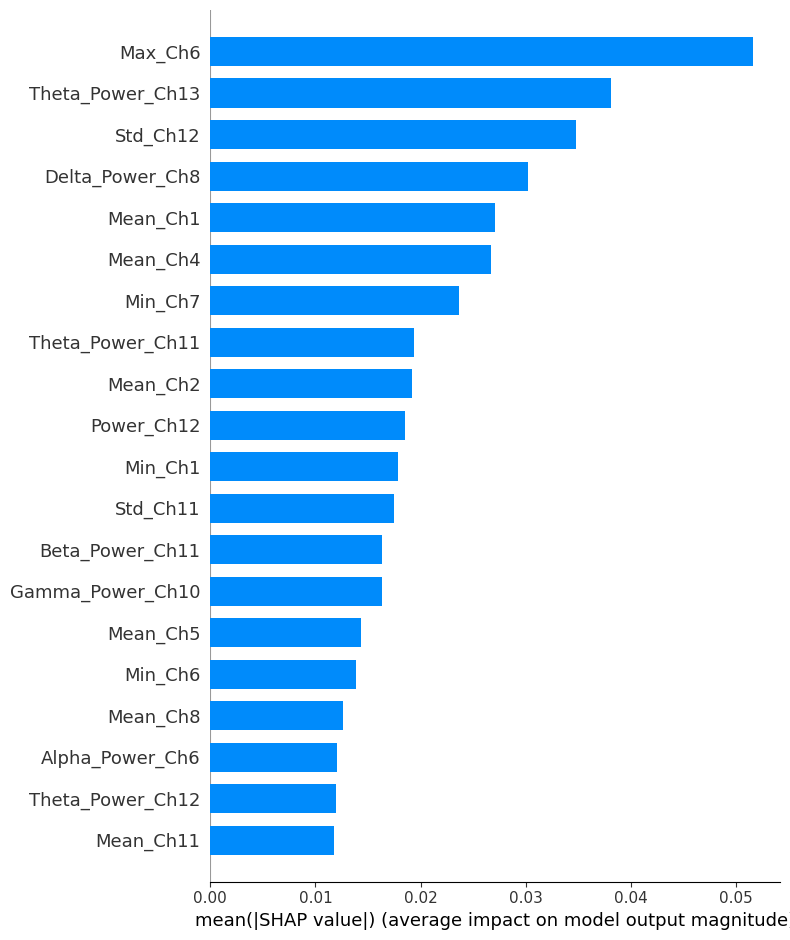

In [ ]:
import shap
import matplotlib.pyplot as plt

# Train a Random Forest model (or use the existing best model)
rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=4, random_state=42)
rf_model.fit(X_train, y_train_val)  # Use Valence as example

# Explain model predictions using SHAP
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

# Plot feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")


---
## Classification

---


---

# Random Forest Classifier

---

---
## RF Valence

---

Valence Classification Accuracy: 67.47 %

Classification Report:
              precision    recall  f1-score   support

         Low       0.83      0.58      0.68        50
        High       0.56      0.82      0.67        33

    accuracy                           0.67        83
   macro avg       0.70      0.70      0.67        83
weighted avg       0.72      0.67      0.68        83



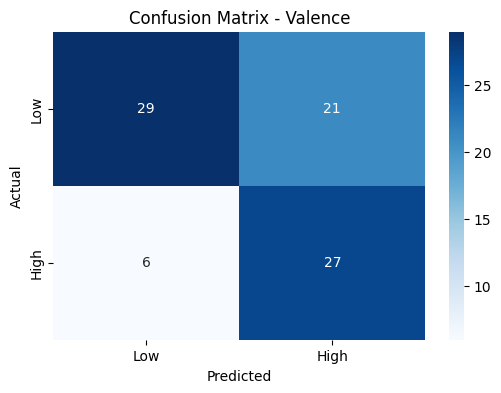

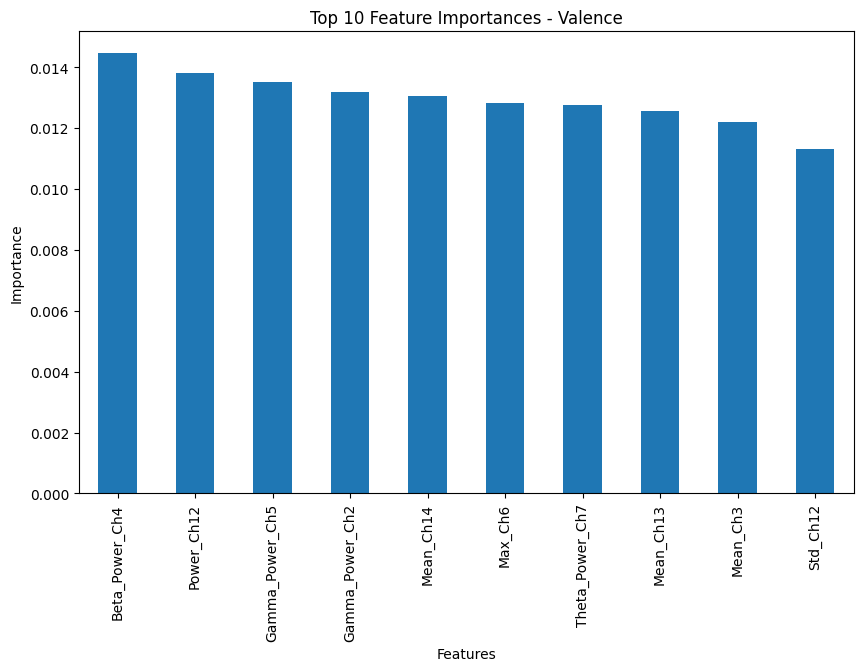

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# 2. Preprocess: Convert Valence to Low/High
def categorize_emotion(rating):
    if rating <= 3:
        return 'Low'
    else:
        return 'High'

data['Valence_class'] = data['Valence'].apply(categorize_emotion)

# 3. Select Features and Target
features = data.drop(['Valence', 'Arousal', 'Dominance', 'Valence_class'], axis=1)
target = data['Valence_class']

# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# 5. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# 7. Evaluate the Model
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Valence Classification Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'High'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Valence')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Feature Importances - Valence')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

---
## RF Arousal

---


Arousal Classification Accuracy: 73.49 %

Classification Report:
              precision    recall  f1-score   support

         Low       0.78      0.74      0.76        47
        High       0.68      0.72      0.70        36

    accuracy                           0.73        83
   macro avg       0.73      0.73      0.73        83
weighted avg       0.74      0.73      0.74        83



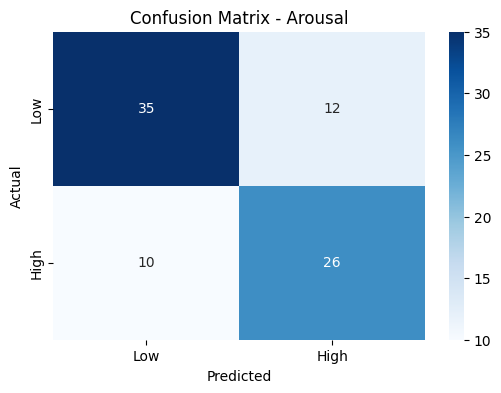

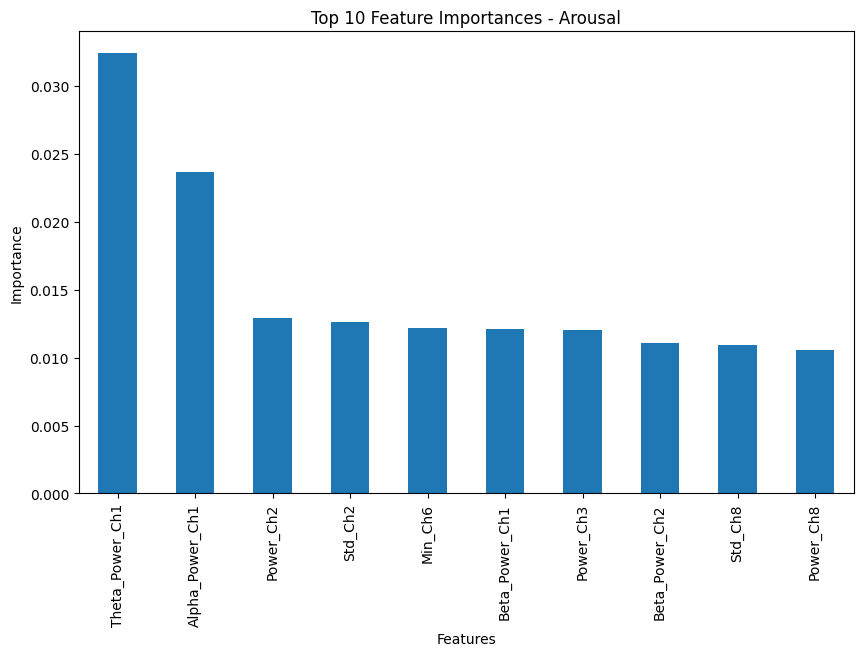

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# 2. Preprocess: Convert Arousal to Low/High
def categorize_emotion(rating):
    if rating <= 3:
        return 'Low'
    else:
        return 'High'

data['Arousal_class'] = data['Arousal'].apply(categorize_emotion)

# 3. Select Features and Target
features = data.drop(['Valence', 'Arousal', 'Dominance', 'Arousal_class'], axis=1)
target = data['Arousal_class']

# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# 5. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# 7. Evaluate the Model
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Arousal Classification Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'High'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Arousal')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Feature Importances - Arousal')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

---
## RF Dominance

---

Dominance Classification Accuracy: 78.31 %

Classification Report:
              precision    recall  f1-score   support

         Low       0.76      0.86      0.80        43
        High       0.82      0.70      0.76        40

    accuracy                           0.78        83
   macro avg       0.79      0.78      0.78        83
weighted avg       0.79      0.78      0.78        83



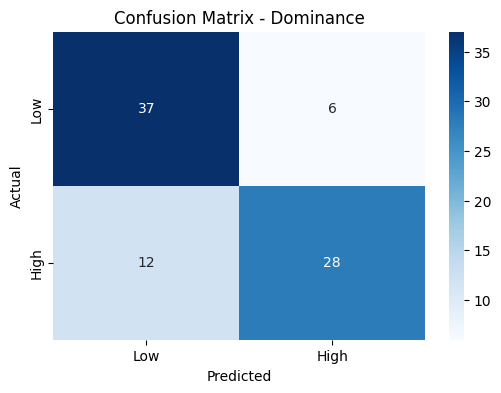

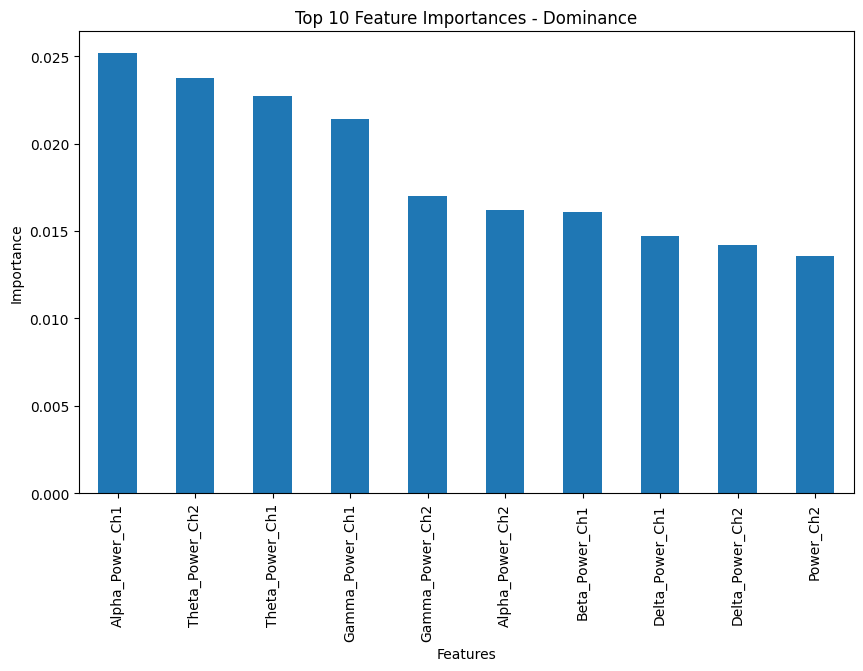

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# 2. Preprocess: Convert Dominance to Low/High
def categorize_emotion(rating):
    if rating <= 3:
        return 'Low'
    else:
        return 'High'

data['Dominance_class'] = data['Dominance'].apply(categorize_emotion)

# 3. Select Features and Target
features = data.drop(['Valence', 'Arousal', 'Dominance', 'Dominance_class'], axis=1)
target = data['Dominance_class']

# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# 5. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# 7. Evaluate the Model
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Dominance Classification Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'High'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Dominance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Feature Importances - Dominance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

---
## SVM Valence

---

Valence Classification Accuracy: 72.29 %

Classification Report:
              precision    recall  f1-score   support

         Low       0.83      0.68      0.75        50
        High       0.62      0.79      0.69        33

    accuracy                           0.72        83
   macro avg       0.72      0.73      0.72        83
weighted avg       0.75      0.72      0.73        83



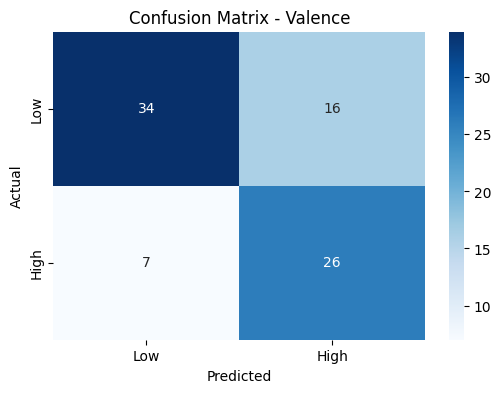

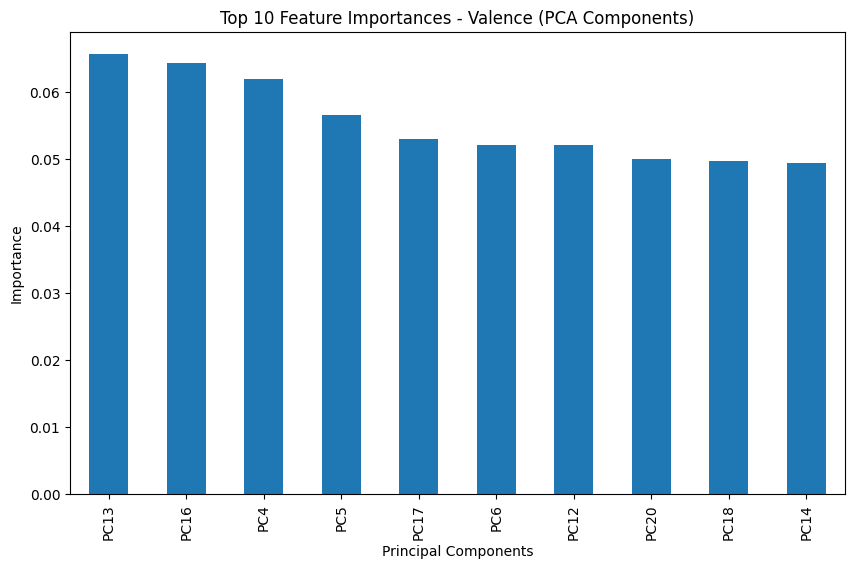

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# 2. Preprocess: Convert Valence to Low/High
def categorize_emotion(rating):
    if rating <= 3:
        return 'Low'
    else:
        return 'High'

data['Valence_class'] = data['Valence'].apply(categorize_emotion)

# 3. Select Features and Target
features = data.drop(['Valence', 'Arousal', 'Dominance', 'Valence_class'], axis=1)
target = data['Valence_class']

# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# 5. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Feature Selection with RFE
base_svm = SVC(kernel='linear', random_state=42)  # Linear for RFE
rfe = RFE(estimator=base_svm, n_features_to_select=30)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)
selected_features = features.columns[rfe.support_].tolist()

# 7. Train SVM Classifier (RBF kernel)
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    class_weight='balanced',
    random_state=42
)
svm_model.fit(X_train_rfe, y_train)

# 8. Evaluate the Model
y_pred = svm_model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print("Valence Classification Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-Validation
cv_scores = cross_val_score(svm_model, X_train_rfe, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'High'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Valence')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (based on RFE ranking)
feature_ranking = pd.Series(rfe.ranking_, index=features.columns)
selected_importance = feature_ranking[feature_ranking == 1]
plt.figure(figsize=(10, 6))
selected_importance.sort_values().head(10).plot(kind='bar')
plt.title('Top 10 Selected Features - Valence (RFE)')
plt.xlabel('Features')
plt.ylabel('Selection Rank (1 = Selected)')
plt.show()

---

## SVM Arousal
---

Arousal Classification Accuracy: 74.7 %

Classification Report:
              precision    recall  f1-score   support

         Low       0.78      0.77      0.77        47
        High       0.70      0.72      0.71        36

    accuracy                           0.75        83
   macro avg       0.74      0.74      0.74        83
weighted avg       0.75      0.75      0.75        83



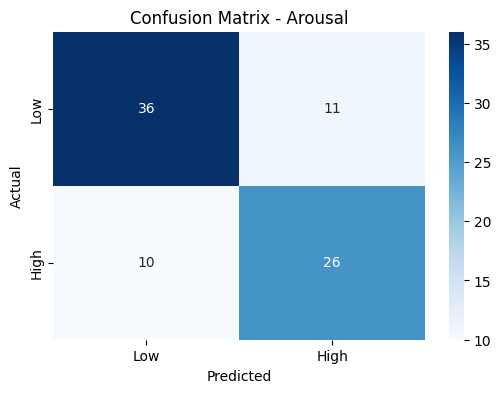

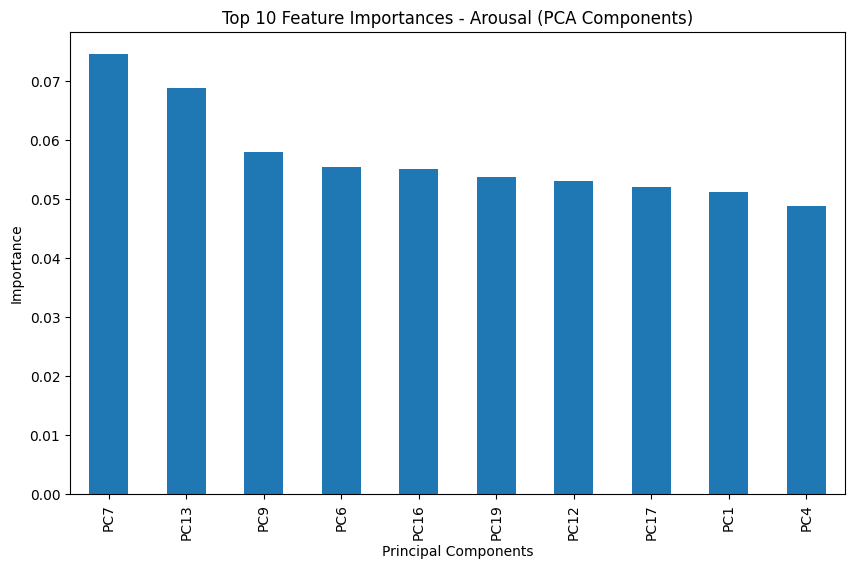

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# 2. Preprocess: Convert Arousal to Low/High
def categorize_emotion(rating):
    if rating <= 3:
        return 'Low'
    else:
        return 'High'

data['Arousal_class'] = data['Arousal'].apply(categorize_emotion)

# 3. Select Features and Target
features = data.drop(['Valence', 'Arousal', 'Dominance', 'Arousal_class'], axis=1)
target = data['Arousal_class']

# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# 5. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Feature Selection with RFE
base_svm = SVC(kernel='linear', random_state=42)  # Linear for RFE
rfe = RFE(estimator=base_svm, n_features_to_select=30)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)
selected_features = features.columns[rfe.support_].tolist()

# 7. Train SVM Classifier (RBF kernel)
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    class_weight='balanced',
    random_state=42
)
svm_model.fit(X_train_rfe, y_train)

# 8. Evaluate the Model
y_pred = svm_model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print("Arousal Classification Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-Validation
cv_scores = cross_val_score(svm_model, X_train_rfe, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'High'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Arousal')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (based on RFE ranking)
feature_ranking = pd.Series(rfe.ranking_, index=features.columns)
selected_importance = feature_ranking[feature_ranking == 1]
plt.figure(figsize=(10, 6))
selected_importance.sort_values().head(10).plot(kind='bar')
plt.title('Top 10 Selected Features - Arousal (RFE)')
plt.xlabel('Features')
plt.ylabel('Selection Rank (1 = Selected)')
plt.show()

---
## SVM Dominance

---

Dominance Classification Accuracy: 78.31 %

Classification Report:
              precision    recall  f1-score   support

         Low       0.77      0.84      0.80        43
        High       0.81      0.72      0.76        40

    accuracy                           0.78        83
   macro avg       0.79      0.78      0.78        83
weighted avg       0.79      0.78      0.78        83



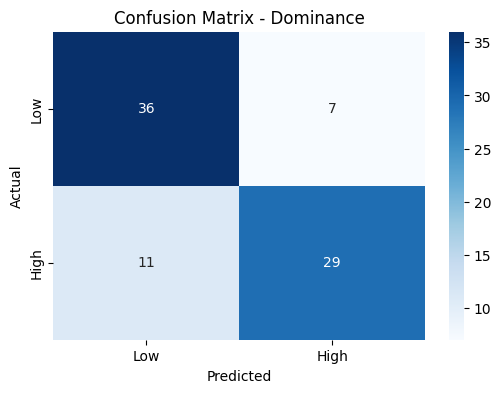

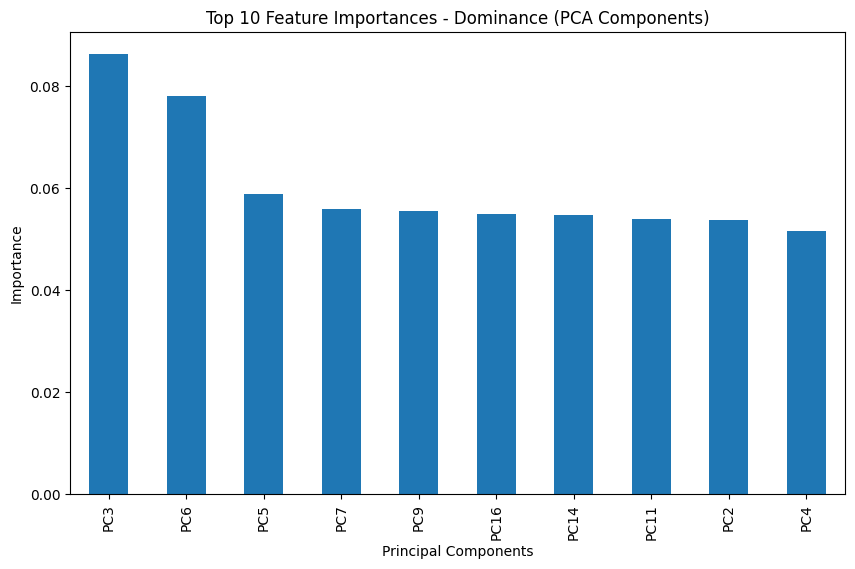

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# 2. Preprocess: Convert Dominance to Low/High
def categorize_emotion(rating):
    if rating <= 3:
        return 'Low'
    else:
        return 'High'

data['Dominance_class'] = data['Dominance'].apply(categorize_emotion)

# 3. Select Features and Target
features = data.drop(['Valence', 'Arousal', 'Dominance', 'Dominance_class'], axis=1)
target = data['Dominance_class']

# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# 5. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Feature Selection with RFE
base_svm = SVC(kernel='linear', random_state=42)  # Linear for RFE
rfe = RFE(estimator=base_svm, n_features_to_select=30)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)
selected_features = features.columns[rfe.support_].tolist()

# 7. Train SVM Classifier (RBF kernel)
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    class_weight='balanced',
    random_state=42
)
svm_model.fit(X_train_rfe, y_train)

# 8. Evaluate the Model
y_pred = svm_model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print("Dominance Classification Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-Validation
cv_scores = cross_val_score(svm_model, X_train_rfe, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'High'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Dominance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (based on RFE ranking)
feature_ranking = pd.Series(rfe.ranking_, index=features.columns)
selected_importance = feature_ranking[feature_ranking == 1]
plt.figure(figsize=(10, 6))
selected_importance.sort_values().head(10).plot(kind='bar')
plt.title('Top 10 Selected Features - Dominance (RFE)')
plt.xlabel('Features')
plt.ylabel('Selection Rank (1 = Selected)')
plt.show()

---
## XGBoost Valence

---

Valence Classification Accuracy: 78.31 %

Classification Report:
              precision    recall  f1-score   support

         Low       0.85      0.78      0.81        50
        High       0.70      0.79      0.74        33

    accuracy                           0.78        83
   macro avg       0.78      0.78      0.78        83
weighted avg       0.79      0.78      0.78        83



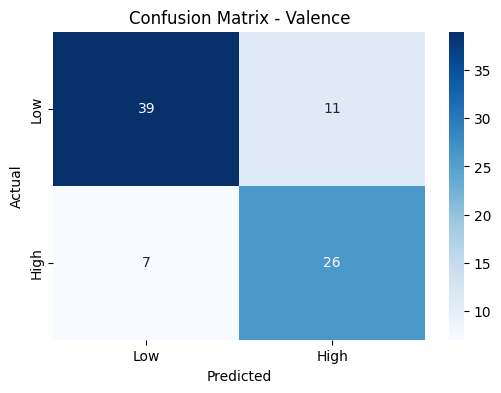

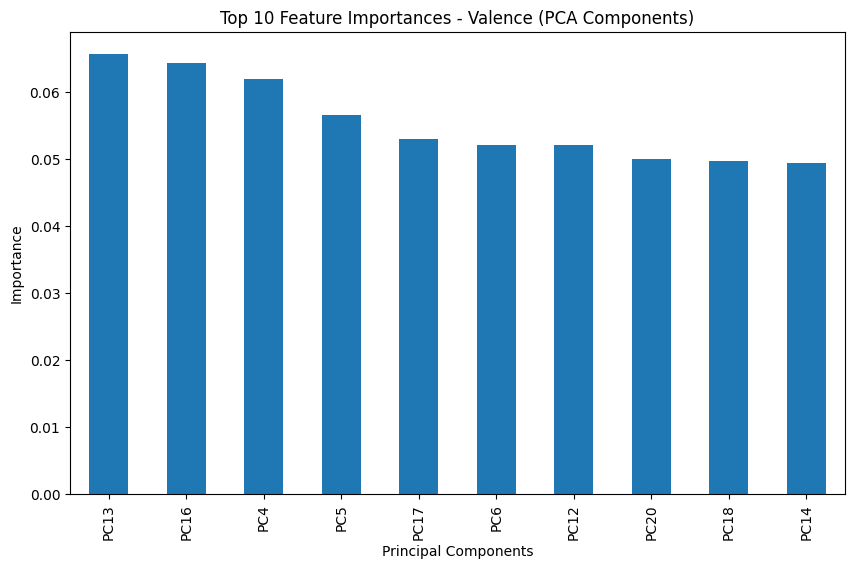

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# 2. Preprocess: Convert Valence to Low/High
def categorize_emotion(rating):
    if rating <= 3:
        return 'Low'
    else:
        return 'High'

data['Valence_class'] = data['Valence'].apply(categorize_emotion)

# 3. Select Features and Target
features = data.drop(['Valence', 'Arousal', 'Dominance', 'Valence_class'], axis=1)
target = data['Valence_class']

# Encode target for XGBoost (Low=0, High=1)
target_encoded = target.map({'Low': 0, 'High': 1})

# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target_encoded, test_size=0.2, random_state=42, stratify=target_encoded
)

# 5. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Apply PCA
pca = PCA(n_components=20, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 7. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train)

# 8. Train XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_balanced, y_train_balanced)

# 9. Evaluate the Model
y_pred = xgb_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Valence Classification Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

# Cross-Validation
cv_scores = cross_val_score(xgb_model, X_train_balanced, y_train_balanced, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Valence')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (PCA components)
feature_importance = pd.Series(xgb_model.feature_importances_, index=[f'PC{i+1}' for i in range(20)])
top_features = feature_importance.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Feature Importances - Valence (PCA Components)')
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.show()

---
## XGBoost Arousal

---

Arousal Classification Accuracy: 83.13 %

Classification Report:
              precision    recall  f1-score   support

         Low       0.84      0.87      0.85        47
        High       0.82      0.78      0.80        36

    accuracy                           0.83        83
   macro avg       0.83      0.83      0.83        83
weighted avg       0.83      0.83      0.83        83



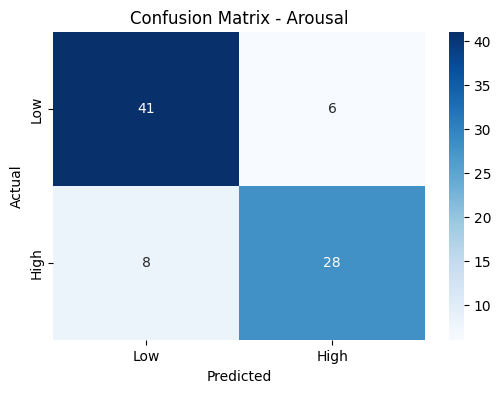

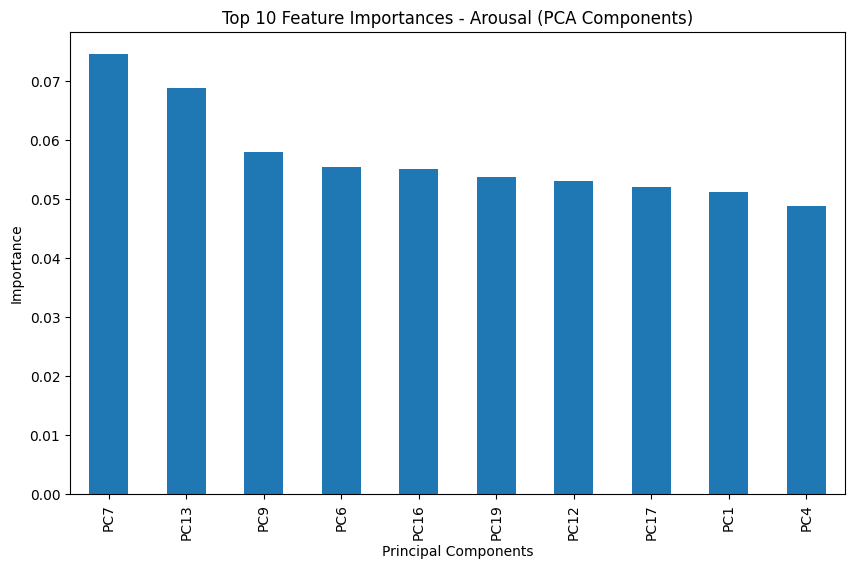

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# 2. Preprocess: Convert Arousal to Low/High
def categorize_emotion(rating):
    if rating <= 3:
        return 'Low'
    else:
        return 'High'

data['Arousal_class'] = data['Arousal'].apply(categorize_emotion)

# 3. Select Features and Target
features = data.drop(['Valence', 'Arousal', 'Dominance', 'Arousal_class'], axis=1)
target = data['Arousal_class']

# Encode target for XGBoost (Low=0, High=1)
target_encoded = target.map({'Low': 0, 'High': 1})

# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target_encoded, test_size=0.2, random_state=42, stratify=target_encoded
)

# 5. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Apply PCA
pca = PCA(n_components=20, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 7. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train)

# 8. Train XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_balanced, y_train_balanced)

# 9. Evaluate the Model
y_pred = xgb_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Arousal Classification Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

# Cross-Validation
cv_scores = cross_val_score(xgb_model, X_train_balanced, y_train_balanced, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Arousal')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (PCA components)
feature_importance = pd.Series(xgb_model.feature_importances_, index=[f'PC{i+1}' for i in range(20)])
top_features = feature_importance.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Feature Importances - Arousal (PCA Components)')
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.show()

---
## XGBoost Dominance

---

Dominance Classification Accuracy: 84.34 %

Classification Report:
              precision    recall  f1-score   support

         Low       0.84      0.86      0.85        43
        High       0.85      0.82      0.84        40

    accuracy                           0.84        83
   macro avg       0.84      0.84      0.84        83
weighted avg       0.84      0.84      0.84        83



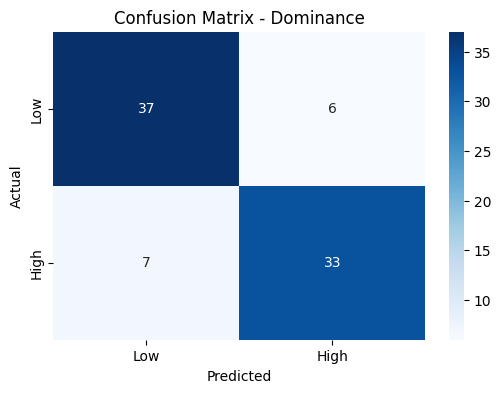

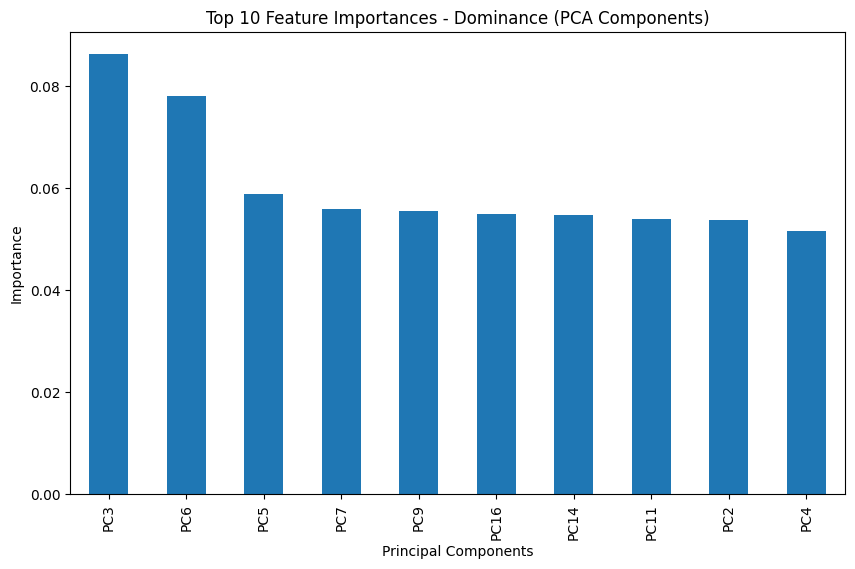

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "/content/drive/MyDrive/Minor Project/Dataset/DREAMER_normalized.csv"
data = pd.read_csv(file_path)

# 2. Preprocess: Convert Dominance to Low/High
def categorize_emotion(rating):
    if rating <= 3:
        return 'Low'
    else:
        return 'High'

data['Dominance_class'] = data['Dominance'].apply(categorize_emotion)

# 3. Select Features and Target
features = data.drop(['Valence', 'Arousal', 'Dominance', 'Dominance_class'], axis=1)
target = data['Dominance_class']

# Encode target for XGBoost (Low=0, High=1)
target_encoded = target.map({'Low': 0, 'High': 1})

# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target_encoded, test_size=0.2, random_state=42, stratify=target_encoded
)

# 5. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Apply PCA
pca = PCA(n_components=20, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 7. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train)

# 8. Train XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_balanced, y_train_balanced)

# 9. Evaluate the Model
y_pred = xgb_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Dominance Classification Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

# Cross-Validation
cv_scores = cross_val_score(xgb_model, X_train_balanced, y_train_balanced, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Dominance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (PCA components)
feature_importance = pd.Series(xgb_model.feature_importances_, index=[f'PC{i+1}' for i in range(20)])
top_features = feature_importance.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Feature Importances - Dominance (PCA Components)')
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.show()

---
Mapping of Valence, Arousal and Dominance with Emotions

---

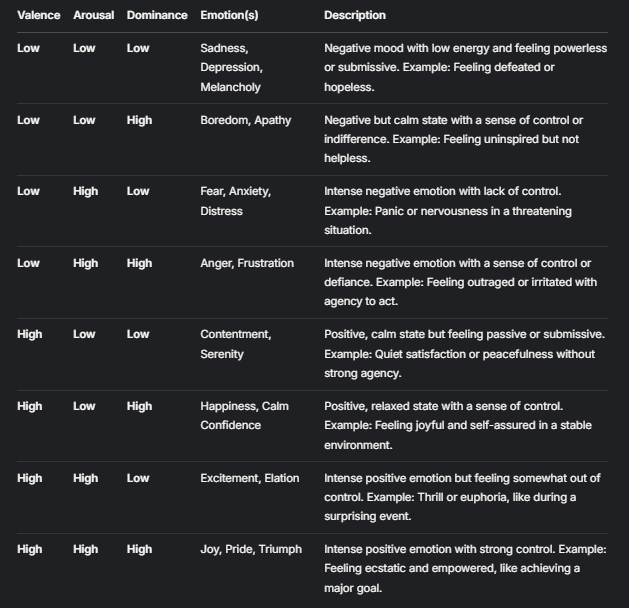